In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])

In [2]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,4


In [3]:
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)

In [4]:
from sklearn.model_selection import train_test_split

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
acc =  classifier.score(X_test, y_test)
print(acc) # 0.6191860465116279

0.6191860465116279


              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



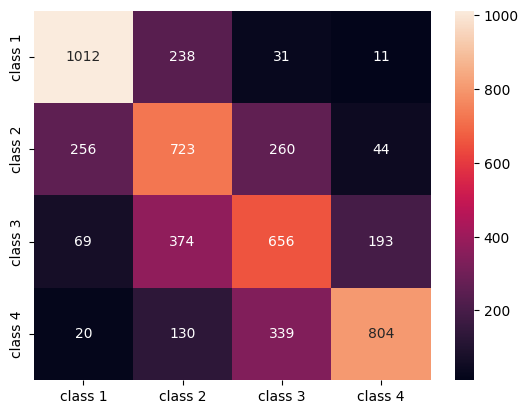

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [10]:
from sklearn.metrics import f1_score

f1s = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

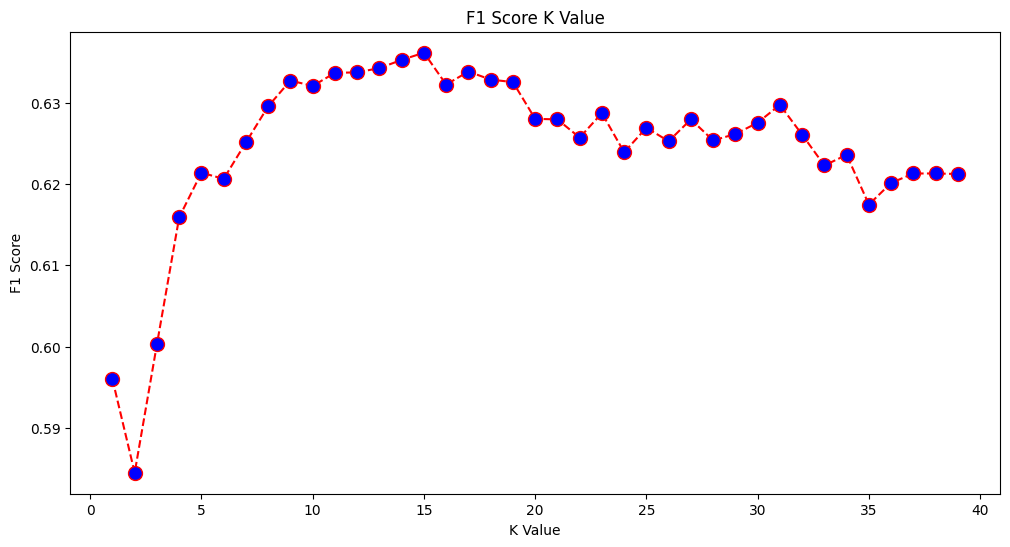

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [12]:
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160

